데이터 불러오기

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('얍💢')

얍💢


In [16]:
data_dir = os.getenv('HOME')+'/aiffel/competitive-data-science-predict-future-sales/data'

train_data_path = join(data_dir, 'sales_train.csv')
sub_data_path = join(data_dir, 'sample_submission.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로
test_data_path = join(data_dir, 'test.csv')
print(train_data_path)
print(sub_data_path)
print(test_data_path)

/home/aiffel-dj48/aiffel/competitive-data-science-predict-future-sales/data/sales_train.csv
/home/aiffel-dj48/aiffel/competitive-data-science-predict-future-sales/data/sample_submission.csv
/home/aiffel-dj48/aiffel/competitive-data-science-predict-future-sales/data/test.csv


In [17]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
test = pd.read_csv(test_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))
print('test data dim : {}'.format(test.shape))

train data dim : (2935849, 6)
sub data dim : (214200, 2)
test data dim : (214200, 3)


In [14]:
print(sub.shape)
sub.head()

(214200, 2)


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [15]:
print(data.shape)
data.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [18]:
print(test.shape)
test.head()

(214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [19]:
y = data['item_price']
del data['item_price']
z = data['item_cnt_day']
del data['item_cnt_day']

print(data.columns)
         

Index(['date', 'date_block_num', 'shop_id', 'item_id'], dtype='object')


In [20]:
train_len = len(data)
data = pd.concat((data, test), axis=0)

print(len(data))

3150049


In [21]:
data.head()

,date,date_block_num,shop_id,item_id,ID
0,02.01.2013,0.0,59,22154,NaN
1,03.01.2013,0.0,25,2552,NaN
2,05.01.2013,0.0,25,2552,NaN
3,06.01.2013,0.0,25,2554,NaN
4,15.01.2013,0.0,25,2555,NaN


<AxesSubplot:>

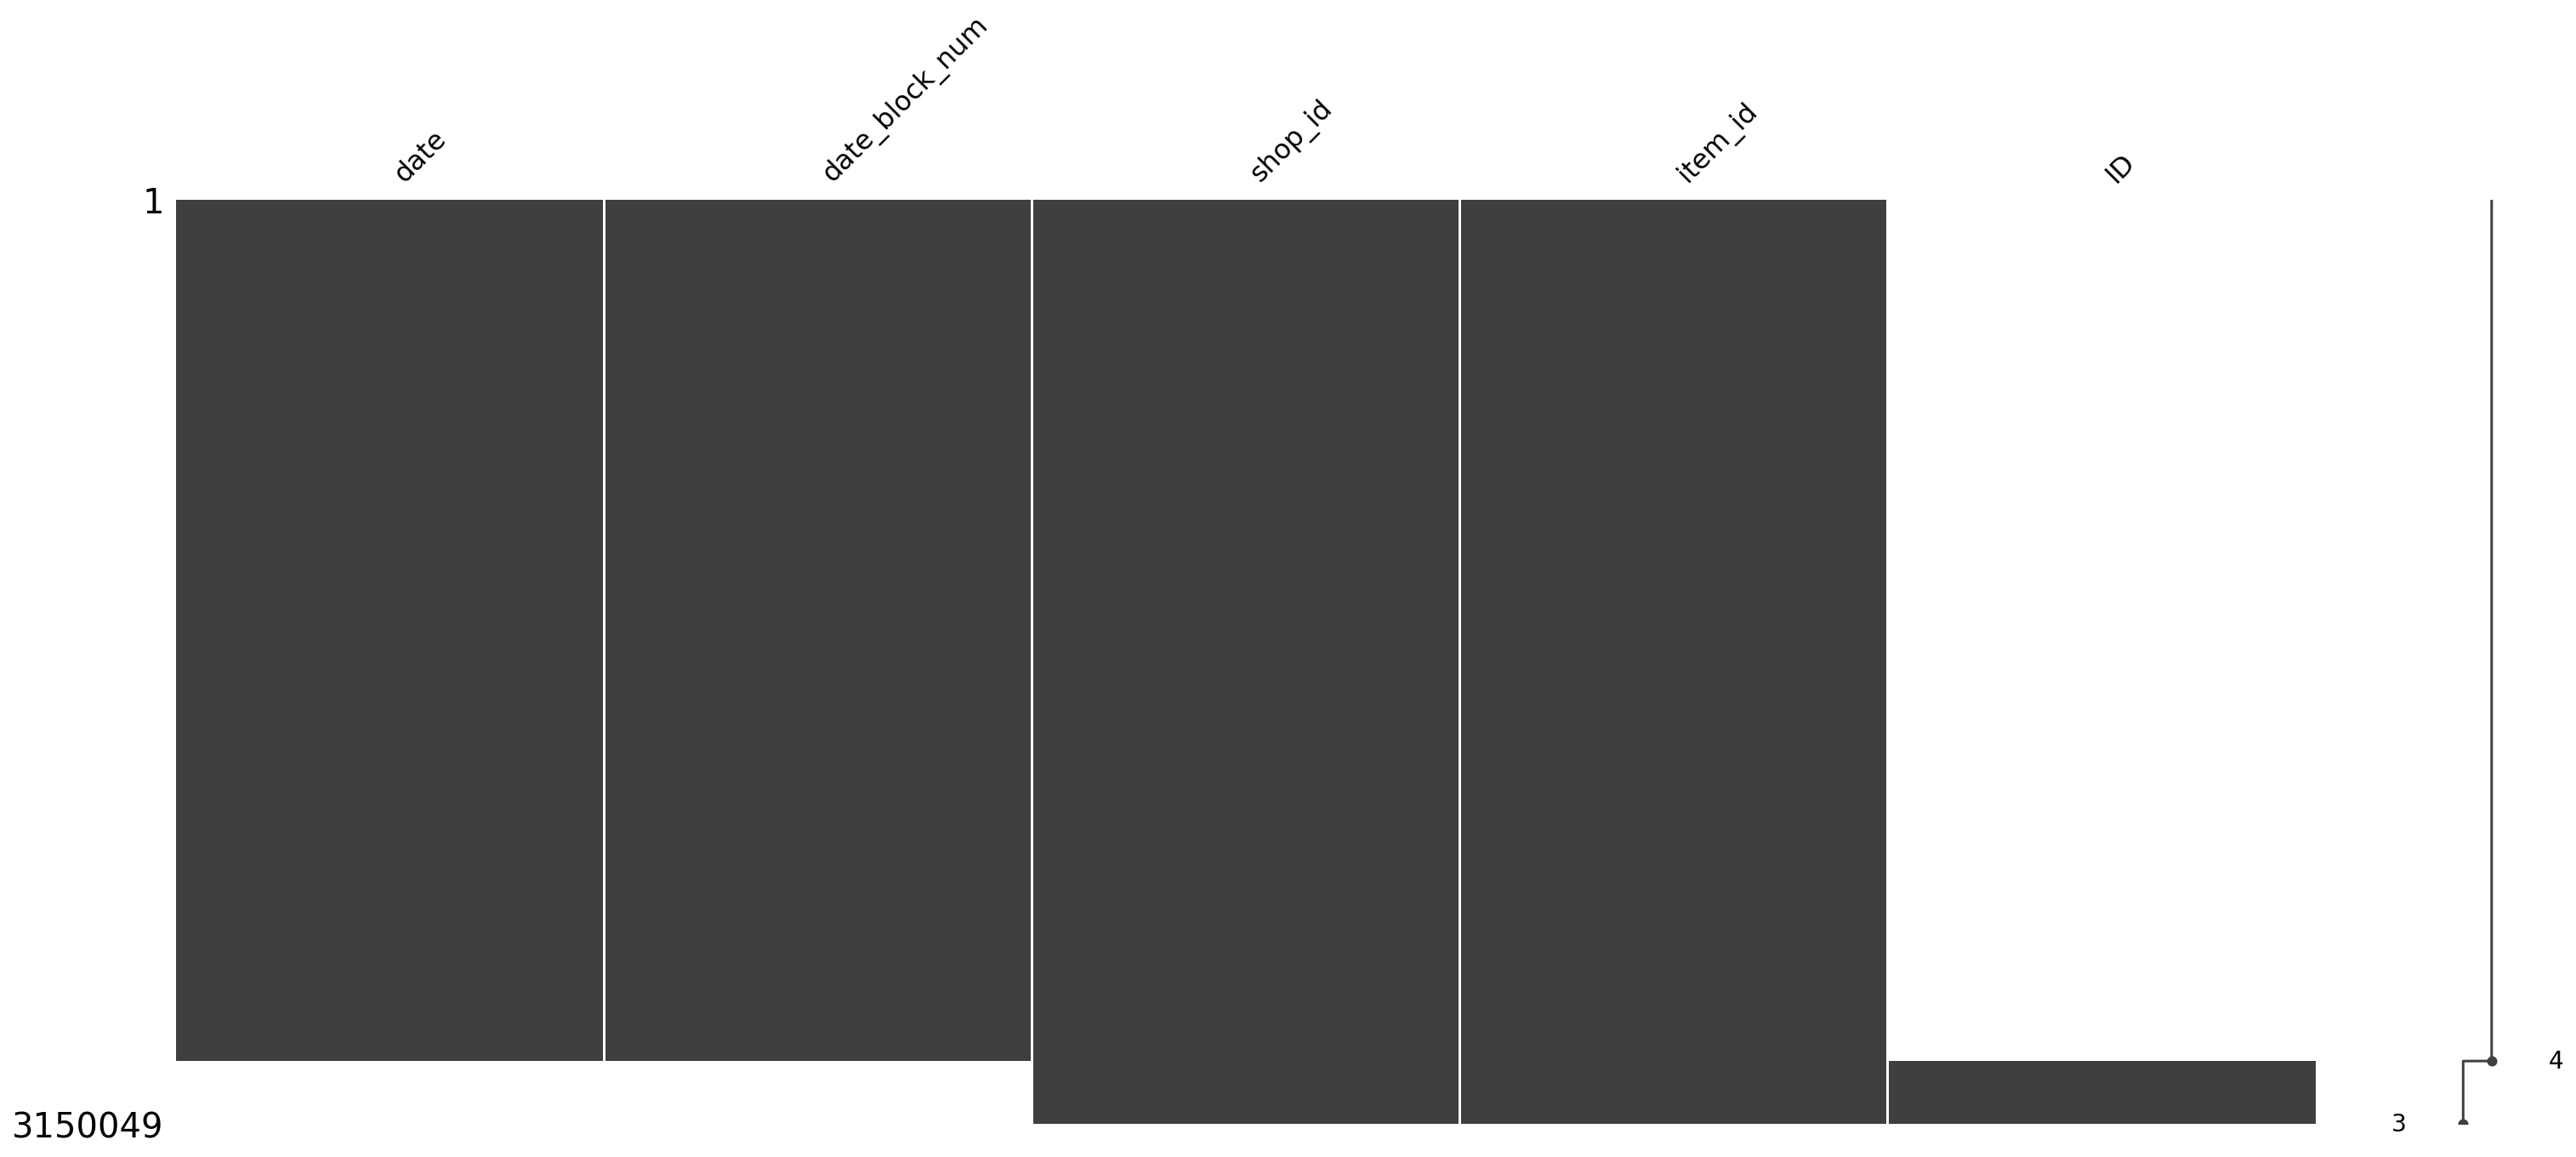

In [23]:
msno.matrix(data)

In [24]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

date : 214200
date_block_num : 214200
shop_id : 0
item_id : 0
ID : 2935849


In [26]:
test_id = data['ID'][train_len:]
del data['ID']

print(data.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id'], dtype='object')


In [ ]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()